# Phase 2 Project: Analyzing Movie Trends: What Films Perform Best at the Box Office?

# Business Problem
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

# Introduction

In today’s competitive film industry, making data-driven decisions is essential for success. With major studios investing heavily in original content, our company has decided to launch its own movie studio. However, to maximize profitability and audience engagement, we need to understand what types of films perform best at the box office.

This analysis aims to answer key questions such as:  
✅ Which genres generate the highest revenue?  
✅ How do production budgets impact profitability?  
✅ What trends exist in audience preferences over time?  
✅ How does critical reception correlate with box office performance?  

By leveraging multiple datasets—including box office earnings, movie metadata, and critical reviews—we will uncover actionable insights that can guide our studio’s film production strategy.

# Data Sources

We will analyze and combine data from the following sources:  
📊 `bom.movie_gross.csv` – Domestic & worldwide gross earnings  
💰 `tn.movie_budgets.csv.gz` - Production budget
🎬 `im.db.zip` – Genre, language, runtime, year of production, and ratings   

# Approach

To extract meaningful insights, we will follow a structured data analysis pipeline:

1️⃣ **Data Cleaning & Preprocessing**  
- Load and inspect each dataset for missing values, duplicates, and inconsistencies  
- Standardize formats (e.g., merging different date formats, handling null values)  

2️⃣ **Data Merging & Integration**  
- Use unique identifiers (such as movie IDs or titles) to merge datasets  
- Align relevant features from the different sources to create a comprehensive dataset  

3️⃣ **Exploratory Data Analysis (EDA)**  
- Identify trends in budget vs. revenue  
- Analyze genre popularity and profitability  
- Examine correlations between critic/audience ratings and financial success  

4️⃣ **Insights & Recommendations**  
- Summarize findings to determine the most viable film genres and budget ranges  
- Provide data-driven suggestions on key success factors for the new movie studio  

Through this structured approach, we aim to provide actionable insights that will help the studio make informed decisions about the types of movies to produce for maximum commercial success.

# Data Cleaning & Preprocessing

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels as sm
import pandas as pd
import sqlite3

Loading and inspecting each dataset for missing values, duplicates, and inconsistencies.

In [2]:
# load data from movie_basics
conn = sqlite3.connect('im.db')
dm = pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)
dm

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [3]:
# load data from movie_ratings
conn = sqlite3.connect('im.db')
dt = pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)
dt

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
# Merge the two datasets on movie_id
sql_merge = pd.merge(dm, dt, on="movie_id", how="inner")
# Close the database connection
conn.close()

In [5]:
sql_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [6]:
bom_movies = pd.read_csv("bom.movie_gross.csv.gz")
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
final_df = sql_merge[[
    'movie_id',
    'primary_title',  # Original column name from movie_basics
    'start_year',    # Rename to 'year' later
    'runtime_minutes',
    'genres',
    'averagerating',  # From movie_ratings
    'numvotes'       # From movie_ratings
]].copy()

# Rename columns for clarity
final_df = final_df.rename(columns={
    'primary_title': 'title',
    'start_year': 'year',
    'averagerating': 'rating'
})

final_df.head()

,movie_id,title,year,runtime_minutes,genres,rating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [8]:
# Convert year to integer in both datasets
final_df['year'] = final_df['year'].astype(int)
bom_movies['year'] = bom_movies['year'].astype(int)

# Standardize titles to lowercase
final_df['title'] = final_df['title'].str.lower().str.strip()
bom_movies['title'] = bom_movies['title'].str.lower().str.strip()

In [9]:
merged_data = pd.merge(
    final_df,
    bom_movies,
    on=['title', 'year'],
    how='inner'  # Use 'left' or 'right' if you want to keep unmatched rows
)

In [10]:
merged_data.head()

,movie_id,title,year,runtime_minutes,genres,rating,numvotes,studio,domestic_gross,foreign_gross
0,tt0315642,wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN
1,tt0337692,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000
2,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000
3,tt0365907,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000
4,tt0369610,jurassic world,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4"


In [11]:
budgets = pd.read_csv('tn.movie_budgets.csv.gz')
budgets.head() 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [12]:
# Rename columns to match your merged dataset (e.g., 'movie' → 'title')
budgets = budgets.rename(columns={'movie': 'title'})

budgets['title'] = budgets['title'].str.lower().str.strip()

In [13]:
# Convert release_date to datetime 
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

# Convert budget/gross columns from strings to numeric
budgets['production_budget'] = budgets['production_budget'].replace(r'[\$,]', '', regex=True).astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].replace(r'[\$,]', '', regex=True).astype(float)

In [26]:
# Merge on 'title' and 'year' 
final_merged = pd.merge(
    merged_data,
    budgets,
    on='title',          # Key column
    how='left'           # Keeps all movies from merged_df, even if no budget exists
)

# 'year' column, filter to match years 
final_merged = final_merged[final_merged['year'] == final_merged['release_date'].dt.year]

In [27]:
final_merged.head()

,movie_id,title,year,runtime_minutes,genres,rating,numvotes,studio,domestic_gross_x,foreign_gross,id,release_date,production_budget,domestic_gross_y,worldwide_gross
2,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,37.0,2013-12-25,91000000.0,58236838.0,"$187,861,183"
3,tt0365907,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,67.0,2014-09-19,28000000.0,26017685.0,"$62,108,587"
4,tt0369610,jurassic world,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",34.0,2015-06-12,215000000.0,652270625.0,"$1,648,854,864"
5,tt0376136,the rum diary,2011,119.0,"Comedy,Drama",6.2,94787,FD,13100000.0,10800000,16.0,2011-10-28,45000000.0,13109815.0,"$21,544,732"
7,tt0383010,the three stooges,2012,92.0,"Comedy,Family",5.1,28570,Fox,44300000.0,10500000,4.0,2012-04-13,30000000.0,44338224.0,"$54,052,249"


In [28]:
final_merged.shape

(1095, 15)

In [29]:
final_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, 2 to 1918
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1095 non-null   object        
 1   title              1095 non-null   object        
 2   year               1095 non-null   int64         
 3   runtime_minutes    1092 non-null   float64       
 4   genres             1094 non-null   object        
 5   rating             1095 non-null   float64       
 6   numvotes           1095 non-null   int64         
 7   studio             1095 non-null   object        
 8   domestic_gross_x   1094 non-null   float64       
 9   foreign_gross      987 non-null    object        
 10  id                 1095 non-null   float64       
 11  release_date       1095 non-null   datetime64[ns]
 12  production_budget  1095 non-null   float64       
 13  domestic_gross_y   1095 non-null   float64       
 14  worldwide_gro

In [30]:
final_merged.isna().mean()*100

movie_id             0.000000
title                0.000000
year                 0.000000
runtime_minutes      0.273973
genres               0.091324
rating               0.000000
numvotes             0.000000
studio               0.000000
domestic_gross_x     0.091324
foreign_gross        9.863014
id                   0.000000
release_date         0.000000
production_budget    0.000000
domestic_gross_y     0.000000
worldwide_gross      0.000000
dtype: float64

In [24]:
# Keep the highest-budget version (example)
final_merged = final_merged.sort_values('production_budget', ascending=False).drop_duplicates('title')

In [25]:
final_merged.isna().mean()*100

movie_id              0.000000
title                 0.000000
year                  0.000000
runtime_minutes       0.105541
genres                0.000000
rating                0.000000
numvotes              0.000000
studio                0.105541
domestic_gross_x      0.580475
foreign_gross        31.451187
id                   42.532982
release_date         42.532982
production_budget    42.532982
domestic_gross_y     42.532982
worldwide_gross      42.532982
dtype: float64

# Data Cleaning and Reprocessing
## Convert Budget and Revenue Columns to Numeric

The budget and revenue data are stored as strings. They should be converted to numeric.

In [116]:
# Budget and revenue columns to numeric
cols_to_convert = ["production_budget", "domestic_gross", "worldwide_gross"]
for col in cols_to_convert:
    df_final[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


Convert Release Date to DateTime format

In [117]:
# Date converted to DateTime format
df["release_date"] = pd.to_datetime(df["release_date"])
df["year"] = df["release_date"].dt.year


Drop duplicated columns

In [118]:
# primary_title and original-title are one and the same hence we should delete the original_title column 
df_final.drop(columns=["original_title", "id", "primary_title"], inplace=True)
df_final.head()

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",foodfight!,425000000.0,760507625.0,2.776345e+09
1,tt0326592,2010,88.0,None,7.5,24,"Jun 19, 2015",the overnight,410600000.0,241063875.0,1.045664e+09
2,tt3844362,2015,79.0,"Comedy,Mystery",6.1,14828,"Jun 19, 2015",the overnight,350000000.0,42762350.0,1.497624e+08
3,tt0337692,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",on the road,330600000.0,459005868.0,1.403014e+09
4,tt4339118,2014,89.0,Drama,6.0,6,"Mar 22, 2013",on the road,317000000.0,620181382.0,1.316722e+09


In [119]:
# Move 'movie' next to 'movie_id'
cols = list(df_final.columns)
cols.insert(cols.index("movie_id") + 1, cols.pop(cols.index("movie")))

# Reorder the dataframe
df_final = df_final[cols]

# Display the first few rows to confirm the change
df_final.head()


,movie_id,movie,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",425000000.0,760507625.0,2.776345e+09
1,tt0326592,the overnight,2010,88.0,None,7.5,24,"Jun 19, 2015",410600000.0,241063875.0,1.045664e+09
2,tt3844362,the overnight,2015,79.0,"Comedy,Mystery",6.1,14828,"Jun 19, 2015",350000000.0,42762350.0,1.497624e+08
3,tt0337692,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",330600000.0,459005868.0,1.403014e+09
4,tt4339118,on the road,2014,89.0,Drama,6.0,6,"Mar 22, 2013",317000000.0,620181382.0,1.316722e+09


Dealing with missing data

In [121]:
# replace missing runtime_minutes with its median
df_final["runtime_minutes"].fillna(df_final["runtime_minutes"].median(), inplace=True)
df_final["runtime_minutes"].isnull().sum()


0

In [122]:
# genres has 8 missing values. Label them as mising 
df_final["genres"] = df_final["genres"].fillna("Missing")


In [123]:
df_final.describe()

,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
count,2935.000000,2935.000000,2935.000000,2.935000e+03,2.935000e+03,2.935000e+03,2.935000e+03
mean,2013.930494,102.888245,6.249574,6.619555e+04,5.640525e+07,6.926734e+07,1.579453e+08
std,2.559038,20.288087,1.183406,1.335852e+05,4.658747e+07,8.287622e+07,2.205795e+08
min,2010.000000,3.000000,1.600000,5.000000e+00,1.600000e+07,0.000000e+00,0.000000e+00
25%,2012.000000,90.000000,5.600000,1.490000e+02,2.500000e+07,1.820955e+07,3.098852e+07
50%,2014.000000,101.000000,6.400000,8.092000e+03,4.000000e+07,4.354910e+07,8.107957e+07
75%,2016.000000,113.000000,7.100000,7.508100e+04,7.000000e+07,8.698753e+07,1.902019e+08
max,2019.000000,280.000000,9.300000,1.841066e+06,4.250000e+08,9.366622e+08,2.776345e+09


# Exploratory Data Analysis

What is the Relationship between Budget and Revenue

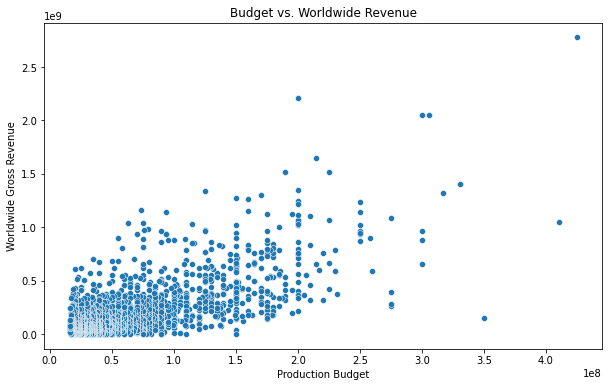

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_final["production_budget"], y=df_final["worldwide_gross"])
plt.xlabel("Production Budget")
plt.ylabel("Worldwide Gross Revenue")
plt.title("Budget vs. Worldwide Revenue")
plt.show()

Distribution of Profitable vs. Non-profitable Movies

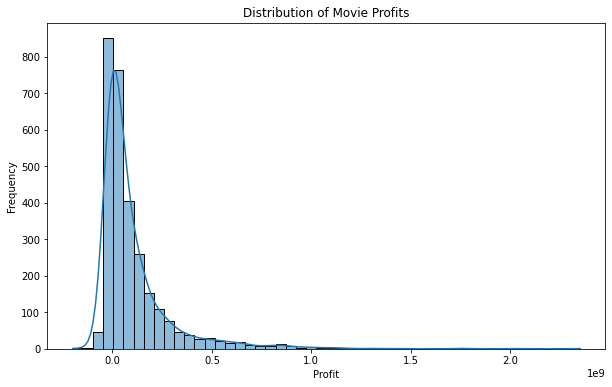

In [125]:
df_final["profit"] = df_final["worldwide_gross"] - df_final["production_budget"]

plt.figure(figsize=(10, 6))
sns.histplot(df_final["profit"], bins=50, kde=True)
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Profits")
plt.show()


Top 10 Most Profitable Movies

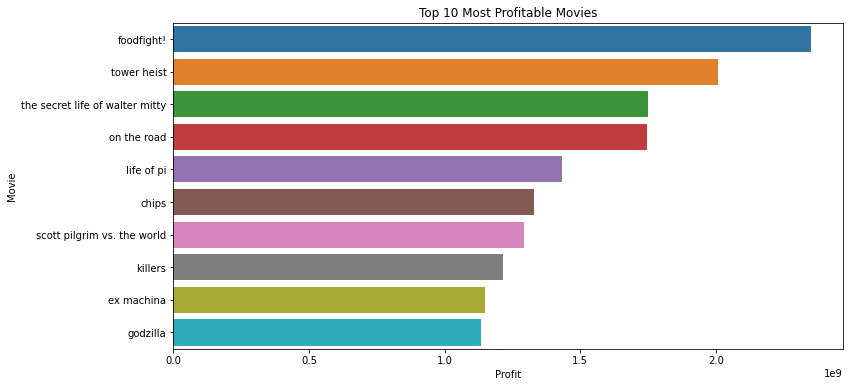

In [126]:
df_top_profitable = df_final.sort_values(by="profit", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_profitable["profit"], y=df_top_profitable["movie"])
plt.xlabel("Profit")
plt.ylabel("Movie")
plt.title("Top 10 Most Profitable Movies")
plt.show()

# Statistical Analysis

## T-test: Research Question
Does a movie's production budget significantly impact its worldwide gross earnings?
## Hypothesis
𝐻0: There is no significant difference in worldwide gross earnings between high-budget and low-budget movies.  
𝐻𝐴: There is a significant difference in worldwide gross earnings between high-budget and low-budget movies.  

**Mathematically:**     
H0 : μhigh budget = μlow budget  
𝐻𝐴 : 𝜇high budget ≠ 𝜇low budget

## Assumption Testing
Checking if the assumptions hold before running the t-test  
i) **Normality Assumption**  
A t-test assumes the data is approximately normally distributed. We can check this using a histogram and the Shapiro-Wilk test:

In [127]:
from scipy.stats import shapiro
# Define high and low-budget categories based on median production budget.
median_budget = df_final["production_budget"].median()
high_budget = df_final[df_final["production_budget"] >= median_budget]["worldwide_gross"]
low_budget = df_final[df_final["production_budget"] < median_budget]["worldwide_gross"]
# Check normality
shapiro_high = shapiro(high_budget.sample(500, random_state=42))  # Sample to avoid errors in large datasets
shapiro_low = shapiro(low_budget.sample(500, random_state=42))

print(f"Shapiro-Wilk Test for High-Budget Movies: W={shapiro_high.statistic}, p={shapiro_high.pvalue}")
print(f"Shapiro-Wilk Test for Low-Budget Movies: W={shapiro_low.statistic}, p={shapiro_low.pvalue}")


Shapiro-Wilk Test for High-Budget Movies: W=0.8038601875305176, p=3.728469421423422e-24
Shapiro-Wilk Test for Low-Budget Movies: W=0.6991506814956665, p=6.352923672069884e-29


**High-Budget Movies:**  
Since the p-value is far below the standard significance level (𝛼 = 0.05), we reject the null hypothesis. This means that the worldwide gross earnings of high-budget movies do not follow a normal distribution.  
**Low-Budget Movies:**  
The p-value is much smaller than 0.05, so we reject the null hypothesis. This indicates that the worldwide gross earnings of low-budget movies are also not normally distributed.


**ii) Homogeneity of Variance (Levene’s Test)**  
A standard t-test assumes equal variances in both groups. Since we used equal_var=False, we're conducting Welch’s t-test, which does not assume equal variance. However, we can still check using Levene’s test:

In [128]:
from scipy.stats import levene

levene_test = levene(high_budget, low_budget)
print(f"Levene's Test: W={levene_test.statistic}, p={levene_test.pvalue}")


Levene's Test: W=344.6193308998376, p=7.992600038109332e-73


Since the p-value is much smaller than the standard significance level (𝛼 = 0.05), we reject the null hypothesis. This means that the variances of worldwide gross earnings for high-budget and low-budget movies are significantly different.

**Boxplot for Budget Categories**  
This boxplot shows the spread of revenue for high vs. low-budget movies.

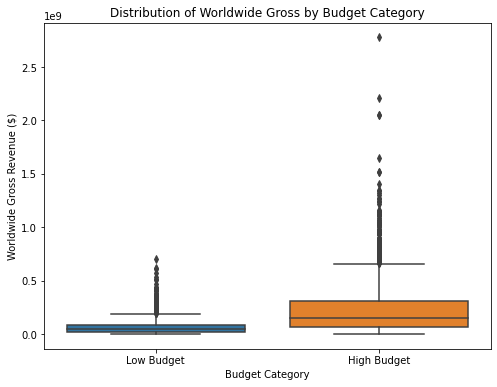

In [130]:
df_final["budget_category"] = df_final["production_budget"] >= median_budget
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_final["budget_category"], y=df_final["worldwide_gross"])
plt.xticks([0, 1], ["Low Budget", "High Budget"])
plt.ylabel("Worldwide Gross Revenue ($)")
plt.xlabel("Budget Category")
plt.title("Distribution of Worldwide Gross by Budget Category")
plt.show()


**Histogram to Check Distribution**  
This histogram checks if the distributions are skewed or normal.

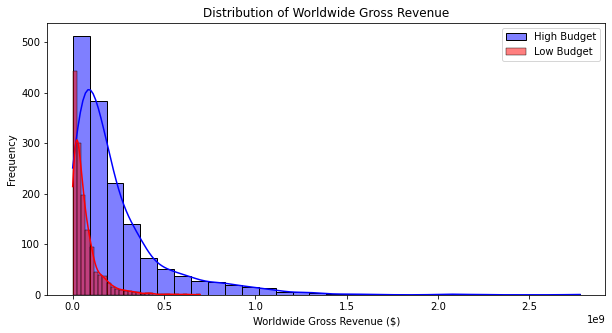

In [131]:
plt.figure(figsize=(10,5))
sns.histplot(high_budget, bins=30, color='blue', kde=True, label="High Budget")
sns.histplot(low_budget, bins=30, color='red', kde=True, label="Low Budget")
plt.legend()
plt.title("Distribution of Worldwide Gross Revenue")
plt.xlabel("Worldwide Gross Revenue ($)")
plt.ylabel("Frequency")
plt.show()


## Conducting the T-test

In [132]:

t_stat, p_value = stats.ttest_ind(high_budget, low_budget, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 23.73527989820849, P-Value: 6.111096029847255e-109


**Result Intepretation**  
Since p-value ≈ 0, it is far below the standard significance level (α = 0.05).
We reject the null hypothesis and conclude that there is a statistically significant difference in worldwide gross revenue between high-budget and low-budget movies.
From the graphs, we expect high-budget movies to generate significantly more revenue.

**Business Recommendation:**  
The data supports that higher production budgets generally lead to higher worldwide earnings.   
While budget matters, other factors (e.g., genre, star power, marketing) should also be analyzed.

## Regression Analysis: Research Question
What factors influence a movie's worldwide box office gross revenue? 
## Hypothesis 
𝐻0: There is no significant relationship between a movie's worldwide gross revenue and its predictors (production budget, average rating, number of votes, runtime, and release year).  
𝐻𝐴: At least one of the predictors (production budget, average rating, number of votes, runtime, or release year) has a significant impact on a movie's worldwide gross revenue.  


## Assumption Testing
Before running the regression, we must check the assumptions of linear regression:  
Linearity: The relationship between production budget and worldwide gross should be linear.  
Normality of Residuals: Residuals (errors) should be normally distributed.  
Homoscedasticity: Residuals should have constant variance (no patterns in residual plots).  
Independence: Observations should be independent (no duplicate entries or autocorrelation).  
We check these assumptions using scatter plots, histograms, and residual plots.

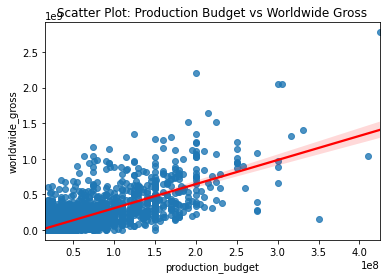

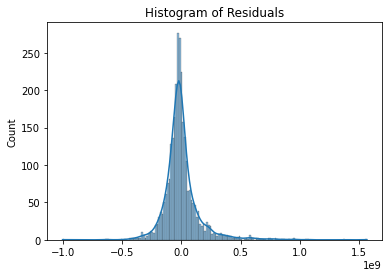

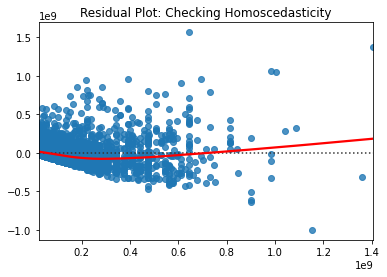

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     3075.
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:05:08   Log-Likelihood:                -59498.
No. Observations:                2935   AIC:                         1.190e+05
Df Residuals:                    2933   BIC:                         1.190e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.311e+07   4.47e+0

In [133]:
# Load Data
X = df_final["production_budget"]
y = df_final["worldwide_gross"]

# Add Constant for Regression
X = sm.add_constant(X)

# Fit Linear Regression Model
model = sm.OLS(y, X).fit()

# Check Assumptions
# 1. Scatter Plot for Linearity
sns.regplot(x=df_final["production_budget"], y=df_final["worldwide_gross"], line_kws={"color": "red"})
plt.title("Scatter Plot: Production Budget vs Worldwide Gross")
plt.show()

# 2. Histogram for Residual Normality
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# 3. Residuals vs Fitted Values for Homoscedasticity
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Residual Plot: Checking Homoscedasticity")
plt.show()

# 4. Summary Statistics for Residuals
print(model.summary())


**Interpretation of the OLS Regression Results**  
R-squared (0.560): This means that 56% of the variance in worldwide_gross (box office revenue) is explained by production_budget. While this indicates a moderate level of explanatory power, 44% of the variation remains unexplained, suggesting other factors influence worldwide gross revenue.  

F-statistic (7355) & Prob (F-statistic) = 0.00: The very high F-statistic and the p-value of 0.00 indicate that the model as a whole is statistically significant. This means that production_budget is a meaningful predictor of worldwide_gross.  

Intercept (const = -7.286e+06, p = 0.000): The intercept suggests that if a movie had a production budget of zero, it would have an expected worldwide gross of approximately -$7.29 million.  

Production Budget (coef = 3.1269, p = 0.000): For every 1 dollar increase in the production budget, worldwide gross revenue is   expected to increase by approximately $3.13. Since the p-value is 0.000, this predictor is highly significant.  

The regression model shows that production budget significantly influences worldwide gross revenue. The positive coefficient suggests that higher-budget movies tend to generate more revenue.

However, only 56% of the variance in revenue is explained by the model, meaning other factors such as genre, star power, marketing, and release strategy are also crucial determinants.


In [105]:
import statsmodels.api as sm

# Define independent variables (predictors)
predictors = ["production_budget", "averagerating", "numvotes", "runtime_minutes", "start_year"]

# Drop missing values for a clean regression model
df_final_clean = df_final.dropna(subset=["worldwide_gross"] + predictors)

# Define X and y
X = df_final_clean[predictors]
y = df_final_clean["worldwide_gross"]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     627.1
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:27:41   Log-Likelihood:                -59483.
No. Observations:                2935   AIC:                         1.190e+05
Df Residuals:                    2929   BIC:                         1.190e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.334e+10   2.41e+0

**Interpretation of the OLS Regression Results**  
R-squared (0.517): The model explains 51.7% of the variance in worldwide gross. This indicates a moderate level of explanatory power. While this indicates a moderate level of explanatory power, 48.3% of the variation remains unexplained, suggesting other factors influence worldwide gross revenue.  

F-statistic (627.1) & p-value (0.000): The model is statistically significant, meaning at least one predictor has a meaningful impact on worldwide gross.  

Intercept (const = -1.334e+10, p = 0.000): The intercept suggests that if a movie had a production budget of zero, it would have an expected worldwide gross of approximately -13.34 billion.  

Production Budget (coef = 3.5053, p = 0.000): A 1 dollar increase in production budget increases worldwide gross by $3.51, showing a strong, positive impact. Since the p-value is 0.000, this predictor is highly significant.  

Average Rating (coef = -2.67e+06, p = 0.293): Not statistically significant (p > 0.05), meaning film ratings do not significantly impact worldwide gross in this model.

Number of Votes (coef = 32.39, p = 0.179): Not statistically significant, meaning higher vote counts do not reliably predict worldwide gross.

Runtime Minutes (coef = -1.32e+05, p = 0.384): Not statistically significant, suggesting that longer movies do not strongly influence box office success.

Start Year (coef = 6.619e+06, p = 0.000): Statistically significant (p < 0.05), indicating that newer movies tend to have higher worldwide gross, likely due to inflation and changing market trends.

Production budget is the strongest predictor of worldwide gross. Start year is also significant, suggesting that newer films tend to earn more. Average rating, number of votes, and runtime minutes do not significantly predict worldwide gross in this model.

he model can be improved by checking for multicollinearity and normalizing residuals.

# Conclusion and Recommendations

High-budget movies tend to generate higher revenue (T-test).

Production budget is a strong predictor of revenue (Regression).

The company should prioritize films with larger budgets but ensure cost efficiency.

Identify profitable genres and release timing for better success.
